# Seaborn

## seaborn 简介


**Seaborn是一种基于matplotlib**的图形可视化python library。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。

Seaborn其实是在**matplotlib的基础上进行了更高级的API封装**，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。

**应该把Seaborn视为matplotlib的补充，而不是替代物。** 同时它能高度兼容numpy与pandas数据结构以及scipy与statsmodels等统计模式。掌握seaborn能很大程度帮助我们更高效的观察数据与图表，并且更加深入了解它们。


其有如下特点：

- 基于matplotlib aesthetics绘图风格，增加了一些绘图模式
- 增加调色板功能，利用色彩丰富的图像揭示您数据中的模式
- 运用数据子集绘制与比较单变量和双变量分布的功能
- 运用聚类算法可视化矩阵数据
- 灵活运用处理时间序列数据
- 利用网格建立复杂图像集


官方网站：http://seaborn.pydata.org
在接下来的一段时间内，我们将带大家深入地了解各类seaborn绘图函数。


## 使用散点图发现数据之间的关联



散点图是数据可视化中最常用的图像。它直观地向我们展示了数据之间的分布关系，如果数据之间存在线性或者其他相关关系，很容易通过散点图观察出来。



除了之前提到的`plt.scatter()`，使用seaborn也可以绘制散点图。对用的命令是`scatterplot()`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 导入 seaborn 并且命名为sns
sns.set(style="darkgrid") # 设置绘图格式为darkgrid

In [2]:
tips = sns.load_dataset('tips')

In [3]:
# tips = pd.read_csv("../_static/lecture_specific/seaborn/tips.csv")

In [4]:
tips.head() # 查看数据的前五行



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'tip')

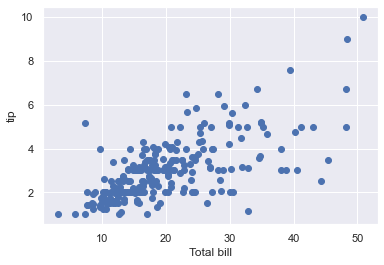

In [5]:
plt.scatter(tips['total_bill'],tips['tip']) # 使用plt.scatter 方法绘制两列数据的散点图
plt.xlabel('Total bill')
plt.ylabel('tip')

Text(0.5, 0, 'Total Bill')

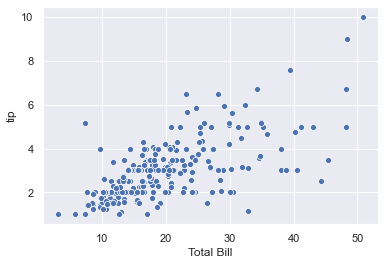

In [6]:
sns.scatterplot(tips.total_bill,tips.tip) # 使用sns.scatterplot 方法绘制两列数据的散点图
plt.xlabel("Total Bill")

除此之外，我们还可以通过在 `relplot()`中指定`kind="scatter"`获取同样的效果。

In [7]:
# sns.relplot(x="total_bill", y="tip", data=tips);

相比于`scatterplot`，`relplot`的集成度更高，在使用方法上也更为方便。例如，如果我们想给散点图加上第三个维度，就直接可以通过一个参数`hue`进行传递即可。该参数将会给不同的类别赋以不同的颜色。

In [8]:
# sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

除此之外，我们还可以继续修改散点的形状，只需要引入`style`参数

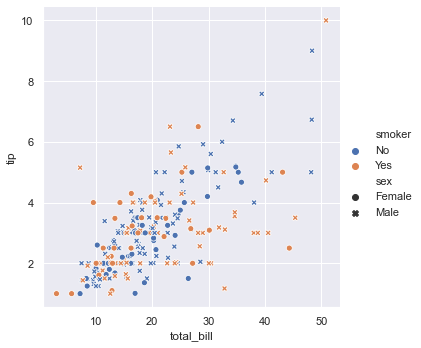

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="sex",data=tips)

结合`hue`和`style`两个参数，我们就可以实现四维数据的绘图。需要注意的是，人眼的形状的敏感性不如颜色，因此该方法应该慎用，因为第四个维度不容易被观察到。

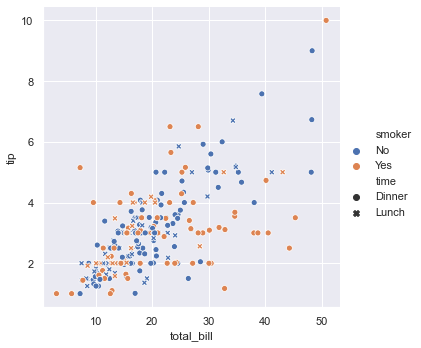

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

在上面的案例中，`hue`参数接受到的是离散的类别数据，而如果我们给它传入一个数值形式的数据，那么`relplot`将会用连续变化的色谱来区分该数据。

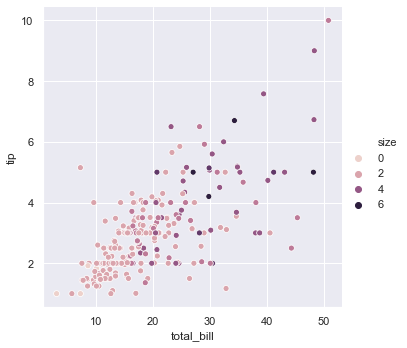

In [11]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

当然了，除了散点的颜色的形状，我们还可以修改散点的大小，只需要指定`size`参数即可。

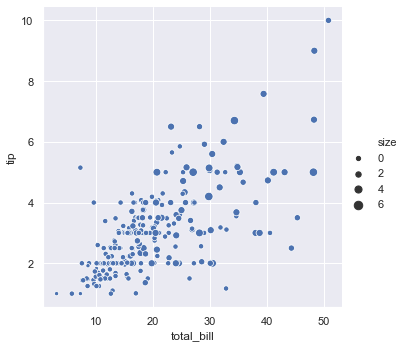

In [12]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

下面是一个综合使用以上参数，得到的一个五维的散点图。

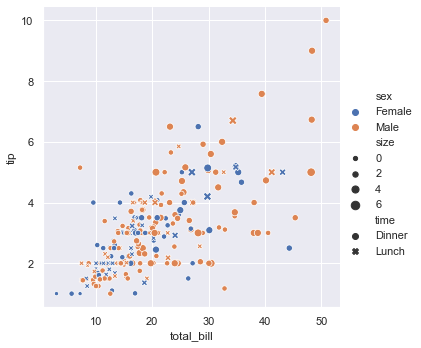

In [13]:
sns.relplot(x="total_bill", y="tip", hue='sex',
            style = 'time',size="size", data=tips);

## 数据的汇总和不确定性的展示

In [14]:
fmri = sns.load_dataset("fmri")
# fmri = pd.read_csv("/home/kesci/input/Seaborn_Demo6897/fmri.csv")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


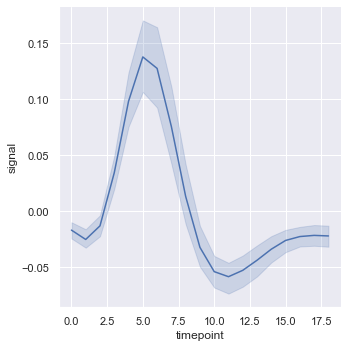

In [15]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

此外，不确定度还可以用标准差来衡量，只需要设置`ci='sd'`即可

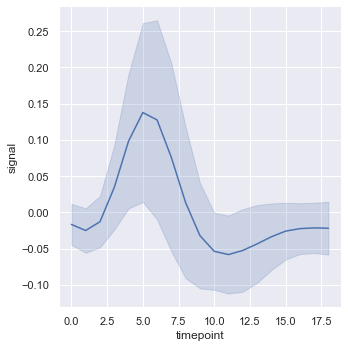

In [16]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

如果我们关掉数据汇总，那么绘制出来的图像会非常奇怪。这是因为在某一个时间，会有多个测量数据。

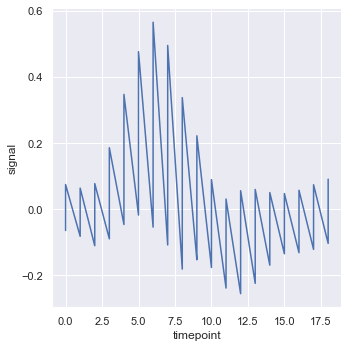

In [17]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

## 绘制子数据集

同`scatterplot()`一样，我们可以通过修改`hue`,`style`,`size`,来增加更多的绘图维度，用法也是非常一致的，这意味着我们可以非常简单地在两种方法之间进行替换。

例如，如果我们引入`hue`参数，对event进行分类。即可得到如下的数据汇总图。

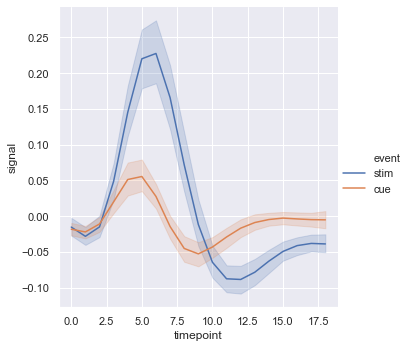

In [18]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

我们继续加入另一个`style`参数，可以把region也考虑进去。

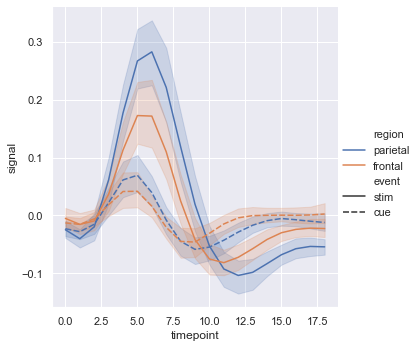

In [19]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

为了突出显示，我们还可以修改线型。

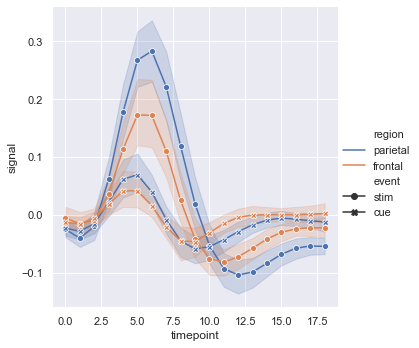

In [20]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

下面我们考虑另一个数据集

In [21]:
dots = sns.load_dataset("dots").query("align == 'dots'")

# dots = pd.read_csv('/home/kesci/input/Seaborn_Demo6897/dots.csv',encoding = 'utf-8')
# dots = dots[dots["align"] == 'dots']
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


上面的例子我们用的是离散变量作为参数`hue`和`chioce`的值，实际上，他们也可以使用连续变量。比如下面的例子

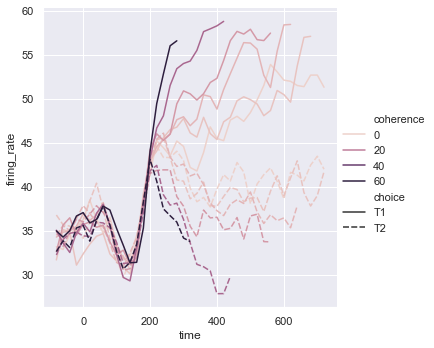

In [22]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

请注意，当`style`的可能性增多时，肉眼可能不太能够区分不同的线型，因此该方法需要在变量取值范围较小的情况下使用。

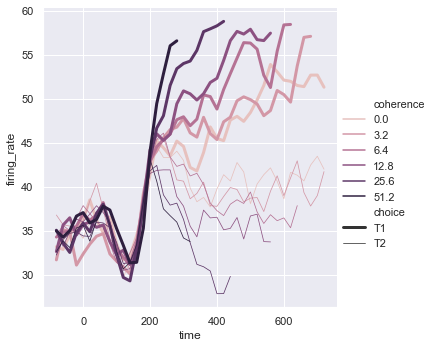

In [23]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

## 使用多张图展示数据之间的相互关系

下面我们学习如何使用多张子图，分析与展示数据之间的相关性。使用的参数主要是`col`

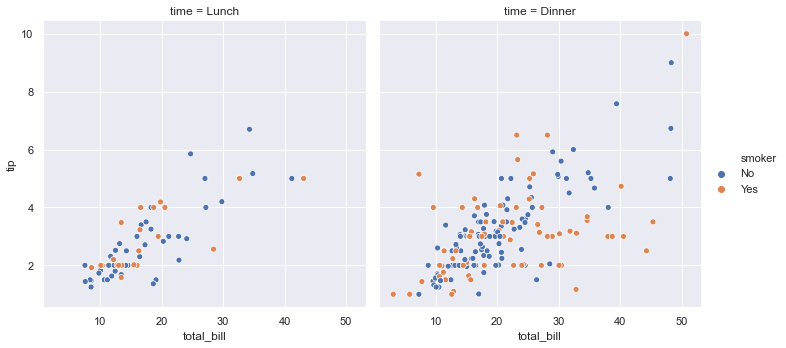

In [24]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

此外，我们还可以通过`row`参数，进一步地扩大子图的规模

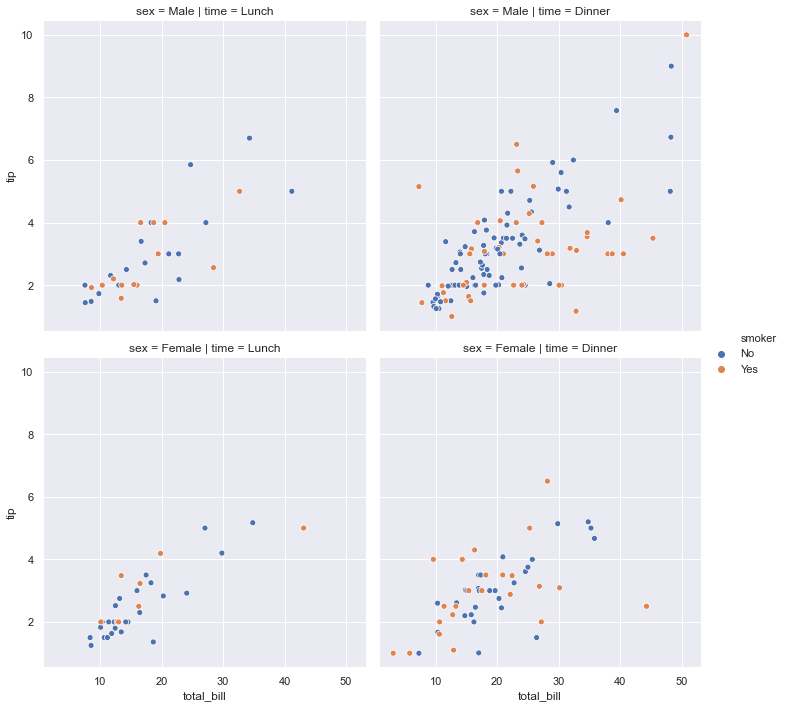

In [25]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time",row = 'sex', data=tips);

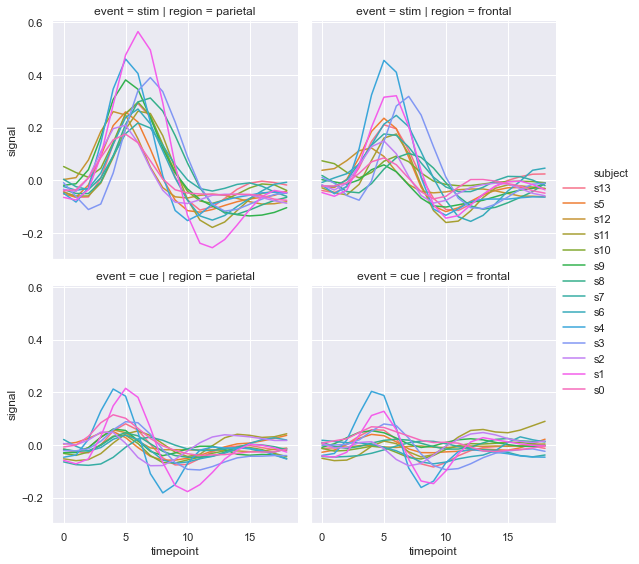

In [26]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=4,
            kind="line", estimator=None, data=fmri);

以上的一系列可视化方法，称为小倍数绘图（ “lattice” plots or “small-multiples”），在研究大规模数据集的时候尤为重要，因为使用该方法，可以把复杂的数据根据一定的规律展示出来，并且借助可视化，使人的肉眼可以识别这种规律。


需要注意的是，有的时候，简单的图比复杂的图更能帮助我们发现和解决问题。

**课堂练习**

使用iris数据集，进行数据可视化。要求以`sepal_length`为横轴，以`sepal_width`为纵轴，以花的种类为颜色标准，绘制散点图。你可以使用如下的代码导入iris数据集。

In [27]:
iris = sns.load_dataset('iris')

In [28]:
# your code here

## 绘制离散形式的变量

在上一节中，我们学习了如何使用`relplot()`描述数据集中多变量之间的关系，其中我们主要关心的是两个数值型变量之间的关系。本节我们进一步地，讨论离散型（ categorical）变量的绘制方法。

在seaborn中，我们有很多可视化离散型随机变量的方法。类似于`relplot()`之于`scatterplot()` 和 `lineplot()`的关系, 我们有一个`catplot()`方法，该方法提高了我们一个从更高层次调用各类函数的渠道，例如`swarmplot()`,`boxplot()`,`violinplot()`等。

在详细地学习这些方法之前，对他们做一个系统地分类是非常有必要的，他们按照绘制内容可以分成如下三类：

- Categorical **scatterplots:**
    * `stripplot()` (with kind="strip"; the default)
    * `swarmplot()` (with kind="swarm")
    
- Categorical **distribution plots:**
    * `boxplot()` (with kind="box")
    * `violinplot()` (with kind="violin")
    * `boxenplot()` (with kind="boxen")
- Categorical **estimate plots:**
    * `pointplot()` (with kind="point")
    * `barplot()` (with kind="bar")
    * `countplot()` (with kind="count")

以上三个类别代表了绘图的不同角度，在实践中，我们要根据要解决的问题，合理地选择使用其中哪种方法。

如果不知道哪种方法比较好，可以都尝试一遍，选择可视化效果更好的一个。

在本教程中，我们主要使用`catplot()`函数进行绘图，如前所述，该函数是基于其他许多函数基础上一个更高层次的调用渠道。

因此如果有针对其中任何一种方法的疑问，都可以在对应的方法的详细介绍中找到解释。

首先，我们需要导入需要的库`seaborn`和`matplotlib.pyplot`

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

### 分类散点图

`catplot()`中的默认绘图方法是`scatterplot`，在`catplot()`中。如果我们只有一个类别，那么散点图绘制的时候，许多数据点会重叠（overlap）在一起，数据区分度和美观性都不强。

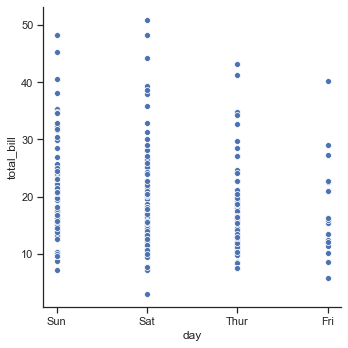

In [30]:
tips = sns.load_dataset('tips')
sns.relplot(x="day", y="total_bill", data=tips);

为了解决这一问题，实际上有两类绘制散点图的方法。


方法一： 我们可以考虑采用`stripplot()`，该方法通过给每一个数据点一个在`x`轴上的小扰动，使得数据点不会过分重叠。`stripplot()`是`catplot()`的默认参数。

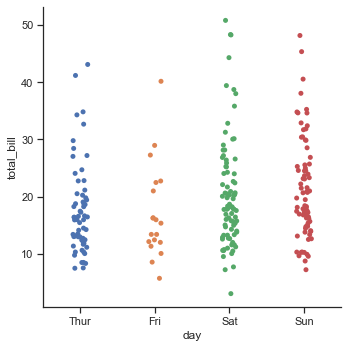

In [31]:
sns.catplot(x="day", y="total_bill", data=tips);

我们可以吧`jitter`参数关掉，观察一下效果。

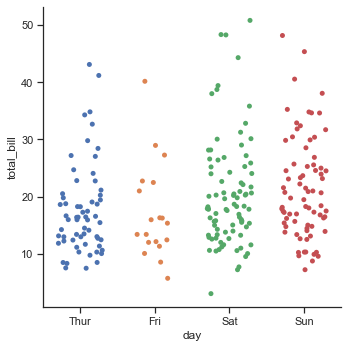

In [32]:
sns.catplot(x="day", y="total_bill", jitter=0.3, data=tips);

方法二： 使用`swarmplot()`，该方法通过特定算法将数据点在横轴上分隔开，进一步提高区分度，防止重叠。该方法对于小数据集尤其适用，调用该方法只需要在`catplot()`中指定参数`kind="swarm"`即可。

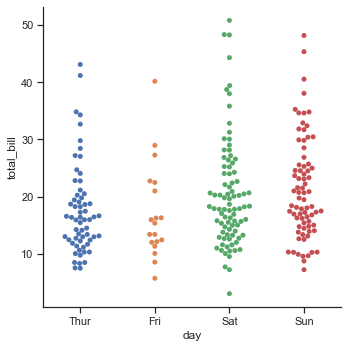

In [33]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

类似于`relplot()`,`catplot()`也可以通过添加颜色进一步增加绘图的维度，对应的参数为`hue`。需要注意的是，`catplot()`暂时不支持`sytle`和`size`参数。

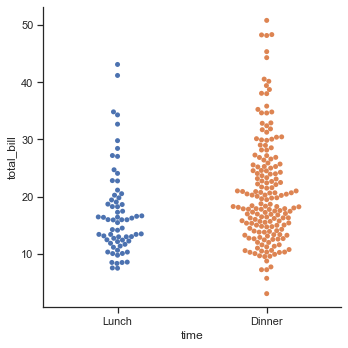

In [34]:
sns.catplot(x="time", y="total_bill",kind="swarm", data=tips);

不像数值型的数据，有的时候，我们对于离散型的类别数据很难得到一个排序的标准。当然，seaborn会尽可能地按照合理的方法给他们排序，如果需要的话也可以人为指定排序。

当我们想要指定绘制顺序的时候，可以使用`order`参数。

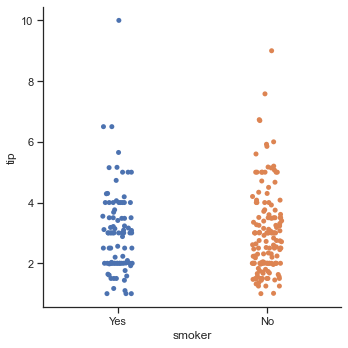

In [35]:
sns.catplot(x="smoker", y="tip", order=["Yes", "No"], data=tips);

有的时候，我们想要把散点图横着画，尤其是在类别比较多的时候，这时我们可以对调`x`和`y`参数，达到该效果。

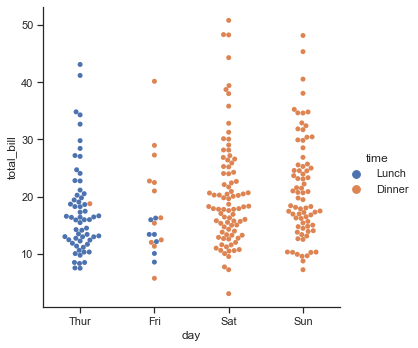

In [36]:
sns.catplot(x="day", y="total_bill", hue="time", kind="swarm", data=tips);

**课堂练习：**

使用上面的方法，对tips数据集进行分析，绘制一个吸烟和吃饭时间（午饭or晚饭）与tip的关系图。你可以自定`x`,`y`轴和染色方法。

In [37]:
# your code here